In [94]:
# Import modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [125]:
new_data = pd.read_csv('data/new_data.csv')
new_data1 = pd.read_csv('data/new_data.csv')

In [135]:
#enlabel the columns
new_data = new_data
new_data['admission_type_id'] = pd.Categorical(new_data.admission_type_id)
new_data['discharge_disposition_id'] = pd.Categorical(new_data.discharge_disposition_id)
new_data['admission_source_id'] = pd.Categorical(new_data.admission_source_id)

cat_cols = list(new_data.select_dtypes(include=[object]).columns)
for col in cat_cols:
   new_data[col] = pd.Categorical(new_data[col])

le = preprocessing.LabelEncoder()

col_to_encode = new_data[list(new_data.select_dtypes(include=['category']).columns)]
for col in col_to_encode:
   new_data[col] = le.fit_transform(new_data[col])


In [ ]:
### 1

In [22]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
#confusion matrix
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[18112     0]
 [ 2242     0]]


In [24]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94     18112
          1       0.00      0.00      0.00      2242

avg / total       0.79      0.89      0.84     20354



/Users/jasonwang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
print(classifier.coef_)

[[-8.26591365e-09 -8.75211822e-09 -2.76826297e-15 -8.16793953e-16
  -9.98396320e-15 -2.52944600e-15 -5.66836765e-15 -8.92920786e-15
  -7.17411014e-15 -4.00652337e-14 -7.41589917e-14 -2.66421030e-15
  -2.36100168e-14  8.43252403e-17  3.65971852e-16  6.80812964e-16
  -1.05368121e-14 -3.47707696e-15 -3.24571414e-15 -2.12147843e-15
  -1.75472808e-15 -1.75991777e-15 -1.75911806e-15 -1.83364364e-15
  -8.89502423e-20 -1.97334295e-15 -2.02141440e-15 -1.16747010e-18
  -1.84538148e-15 -1.88866476e-15 -1.76057857e-15 -1.75564334e-15
  -2.57094134e-19 -2.35351221e-18  0.00000000e+00  0.00000000e+00
  -2.34631133e-15 -1.75381893e-15 -1.23945996e-19 -2.75735461e-20
  -4.16020130e-21 -7.15076168e-21 -1.20366741e-15 -1.18473713e-15
   2.30029994e-15 -1.34139096e-16 -1.47132556e-14 -1.39586423e-14
  -1.41544255e-14 -8.92043444e-18 -1.48751373e-17 -1.03624577e-16]]


In [85]:
new_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitin30days',
       'f_diag', 's_diag', 't_diag', 'self_pay', 'medicaid/medicare',
       'coverByInsurance'],
      dtype='object')

In [ ]:
#### 2

In [97]:
droplis = ['encounter_id','patient_nbr','readmitin30days']
new_data_train = new_data.drop(droplis, axis=1)

In [98]:
#creating a training and testing datasets
y = new_data.readmitin30days
X_train, X_test, y_train, y_test = train_test_split(new_data_train, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(81412, 48) (81412,)
(20354, 48) (20354,)


In [99]:
decision_logit = linear_model.LogisticRegression(C=1e4)
## Fit the model with your data
decision_logit.fit(X_train, y_train)

## The score (accuracy for classification problems):
decision_logit.score(X_train, y_train)

0.8887264776691397

In [130]:
#AUC for training 
from sklearn.metrics import roc_auc_score
roc1=roc_auc_score(y_train, decision_logit.predict_proba(X_train)[:,1])
roc1

0.6429710981134159

In [131]:
#AUC for testing
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, decision_logit.predict_proba(X_test)[:,1])
roc

0.6418761833747424

In [101]:
decision_logit_df = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(decision_logit.coef_).T], axis=1)
decision_logit_df.columns = ["Col", "Coef"]
decision_logit_df = decision_logit_df.sort_values(by="Coef", ascending = False)
decision_logit_df

,Col,Coef
13,number_inpatient,0.261195
41,diabetesMed,0.215549
18,repaglinide,0.109753
14,number_diagnoses,0.050271
12,number_emergency,0.047842
16,A1Cresult,0.044816
2,age,0.032794
1,gender,0.026891
4,discharge_disposition_id,0.022443
6,time_in_hospital,0.011439


In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_logit, new_data, new_data.readmitin30days, cv=5)
scores

array([0.88837575, 0.88837575, 0.8884194 , 0.8884194 , 0.88841392])

In [151]:
#normalize
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(new_data)
newdata2 = transformer.transform(new_data)
newdata2 = pd.DataFrame(newdata2, columns= new_data.columns)
Y = newdata2.readmitin30days

In [167]:
#normalize 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
rfe1 = RFE(model1, 1)
rfe1 = rfe1.fit(newdata2, y)
print(rfe1.n_features_)
print(rfe1.support_)
print(rfe1.ranking_)

1
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
[ 1  2 16 36 13 10  6 21 12  4  3 14 15 35 19  7 40 17 20 18 34 31 28 25
 46 23 22 44 33 24 27 30 42 43 50 51 29 32 45 48 47 49 26 39  5  8  9 11
 41 38 37]


In [168]:
df1 = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(rfe1.ranking_)], axis=1)
df1.columns = ["Col", "rfe"]
df1 = df1.sort_values(by="rfe", ascending = True)
df1

,Col,rfe
0,race,1
1,gender,2
10,num_medications,3
9,num_procedures,4
44,t_diag,5
6,time_in_hospital,6
15,max_glu_serum,7
45,self_pay,8
46,medicaid/medicare,9
5,admission_source_id,10


In [166]:
# create the RFE model and select 3 attributes
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 1)
rfe = rfe.fit(new_data_train, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

1
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False]
[43 34 21 31 29 39 32 45 46 33 41 44 25  4 20 30 28 10  9 35  2 15 23 36
 26  3 17 18  6  1 13  5 47 48 27 37 11 22 14 24 16  8 42 38 40 12 19  7]


In [169]:
df = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(rfe.ranking_)], axis=1)
df.columns = ["Col", "rfe1"]
df = df.sort_values(by="rfe1", ascending = True)
df

,Col,rfe1
29,miglitol,1
20,chlorpropamide,2
25,tolbutamide,3
13,number_inpatient,4
31,tolazamide,5
28,acarbose,6
47,coverByInsurance,7
41,diabetesMed,8
18,repaglinide,9
17,metformin,10


In [170]:
result = pd.concat([df, df1], axis=1)
result.sort_values(by="rfe", ascending = True)

,Col,rfe1,Col,rfe
0,race,43.0,race,1
1,gender,34.0,gender,2
10,num_medications,41.0,num_medications,3
9,num_procedures,33.0,num_procedures,4
44,t_diag,40.0,t_diag,5
6,time_in_hospital,32.0,time_in_hospital,6
15,max_glu_serum,30.0,max_glu_serum,7
45,self_pay,12.0,self_pay,8
46,medicaid/medicare,19.0,medicaid/medicare,9
5,admission_source_id,39.0,admission_source_id,10


In [172]:
new_data1

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,metformin-pioglitazone,change,diabetesMed,readmitin30days,f_diag,s_diag,t_diag,self_pay,medicaid/medicare,coverByInsurance
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,0,"endocrine, nutritional and metabolic diseases,...",No Diagnosis,No Diagnosis,0,0,0
1,1968528,720936,Caucasian,Female,[70-80),6,25,1,10,Surgery-Cardiovascular/Thoracic,...,No,Ch,Yes,0,diseases of the circulatory system,diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...",0,0,0
2,2223336,558360,AfricanAmerican,Female,[60-70),6,25,1,9,Orthopedics-Reconstructive,...,No,No,No,0,injury and poisoning,infectious and parasitic diseases,diseases of the musculoskeletal system and con...,0,0,0
3,2298006,2519748,Caucasian,Male,[60-70),6,25,1,4,InternalMedicine,...,No,Ch,Yes,0,diseases of the respiratory system,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system,0,0,0
4,2356308,608841,AfricanAmerican,Female,[50-60),6,25,1,1,Family/GeneralPractice,...,No,No,Yes,0,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...",0,0,0
5,2363592,1059561,Caucasian,Female,[50-60),6,25,1,1,Cardiology,...,No,No,Yes,0,diseases of the circulatory system,diseases of the nervous system and sense organs,diseases of the circulatory system,0,0,0
6,2398146,8147493,Caucasian,Male,[60-70),6,25,1,1,Cardiology,...,No,No,Yes,0,diseases of the circulatory system,diseases of the respiratory system,diseases of the circulatory system,0,0,0
7,2422806,3377124,Caucasian,Male,[40-50),6,25,1,14,InternalMedicine,...,No,Ch,Yes,0,diseases of the musculoskeletal system and con...,injury and poisoning,"endocrine, nutritional and metabolic diseases,...",0,0,0
8,2466036,4311585,Caucasian,Male,[60-70),6,25,1,10,Cardiology,...,No,Ch,Yes,0,diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,...",0,0,0
9,2473188,981198,Caucasian,Female,[60-70),6,25,1,5,Nephrology,...,No,No,Yes,0,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...",0,0,0


                 time_in_hospital
readmitin30days                  
0                        4.349224
1                        4.768249


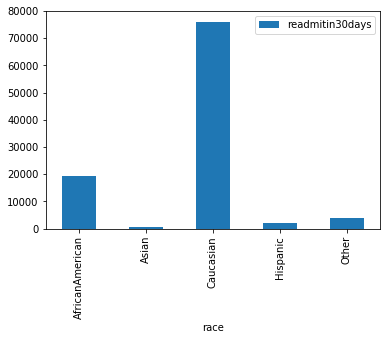

In [174]:
#average time in hospital group by readmission with 30 day
print(new_data[['readmitin30days','time_in_hospital']].groupby(['readmitin30days']).mean())
ave_adm_time = new_data1[['readmitin30days','race']].groupby(['race']).count()
ave_adm_time.plot(kind='bar')